In [1]:
import os
import glob
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
csv_files = [x for x in os.listdir('data') if x.endswith(".csv")]
csv_files = sorted(csv_files)
csv_files

['data_2011-09-26_eur_usd.csv',
 'data_2011-10-26_eur_usd.csv',
 'data_2011-11-26_eur_usd.csv',
 'data_2011-12-26_eur_usd.csv',
 'data_2012-01-26_eur_usd.csv',
 'data_2012-02-26_eur_usd.csv',
 'data_2012-03-26_eur_usd.csv',
 'data_2012-04-26_eur_usd.csv',
 'data_2012-05-26_eur_usd.csv',
 'data_2012-06-26_eur_usd.csv',
 'data_2012-07-26_eur_usd.csv',
 'data_2012-08-26_eur_usd.csv',
 'data_2012-09-26_eur_usd.csv',
 'data_2012-10-26_eur_usd.csv',
 'data_2012-11-26_eur_usd.csv',
 'data_2012-12-26_eur_usd.csv',
 'data_2013-01-26_eur_usd.csv',
 'data_2013-02-26_eur_usd.csv',
 'data_2013-03-26_eur_usd.csv',
 'data_2013-04-26_eur_usd.csv',
 'data_2013-05-26_eur_usd.csv',
 'data_2013-06-26_eur_usd.csv',
 'data_2013-07-26_eur_usd.csv']

1. Show distribution of tweets by month

In [3]:
sep_11 = pd.read_csv('data/data_2011-09-26_eur_usd.csv')
oct_11 = pd.read_csv('data/data_2011-10-26_eur_usd.csv')
nov_11 = pd.read_csv('data/data_2011-11-26_eur_usd.csv')
dec_11 = pd.read_csv('data/data_2011-12-26_eur_usd.csv')
jan_12 = pd.read_csv('data/data_2012-01-26_eur_usd.csv')
feb_12 = pd.read_csv('data/data_2012-02-26_eur_usd.csv')
mar_12 = pd.read_csv('data/data_2012-03-26_eur_usd.csv')
apr_12 = pd.read_csv('data/data_2012-04-26_eur_usd.csv')
may_12 = pd.read_csv('data/data_2012-05-26_eur_usd.csv')
jun_12 = pd.read_csv('data/data_2012-06-26_eur_usd.csv')
jul_12 = pd.read_csv('data/data_2012-07-26_eur_usd.csv')
aug_12 = pd.read_csv('data/data_2012-08-26_eur_usd.csv')
sep_12 = pd.read_csv('data/data_2012-09-26_eur_usd.csv')
oct_12 = pd.read_csv('data/data_2012-10-26_eur_usd.csv')
nov_12 = pd.read_csv('data/data_2012-11-26_eur_usd.csv')
dec_12 = pd.read_csv('data/data_2012-12-26_eur_usd.csv')
jan_13 = pd.read_csv('data/data_2013-01-26_eur_usd.csv')
feb_13 = pd.read_csv('data/data_2013-02-26_eur_usd.csv')
mar_13 = pd.read_csv('data/data_2013-03-26_eur_usd.csv')
apr_13 = pd.read_csv('data/data_2013-04-26_eur_usd.csv')
may_13 = pd.read_csv('data/data_2013-05-26_eur_usd.csv')
jun_13 = pd.read_csv('data/data_2013-06-26_eur_usd.csv')
jul_13 = pd.read_csv('data/data_2013-07-26_eur_usd.csv')

In [4]:
dfs_names = ['sep_11', 'oct_11', 'nov_11', 'dec_11', 'jan_12', 'feb_12', 'mar_12', 'apr_12', 'may_12', 'jun_12','jul_12', 'aug_12', 'sep_12', 'oct_12', 'nov_12', 'dec_12','jan_13', 'feb_13', 'mar_13', 'apr_13', 'may_13', 'jun_13', 'jul_13']


In [5]:
dfs = [sep_11, oct_11, nov_11, dec_11, jan_12, feb_12, mar_12, apr_12, may_12, jun_12,jul_12, aug_12, sep_12, oct_12, nov_12, dec_12, jan_13, feb_13, mar_13, apr_13, may_13, jun_13, jul_13]
len(dfs)

23

Number of tweets per month

In [6]:
num_tweets_per_month = [0 for _ in range(len(dfs_names))]
for i in range(len(csv_files)):
  df = pd.read_csv('data/' + csv_files[i])
  num_tweets_per_month[i] = df.shape[0]

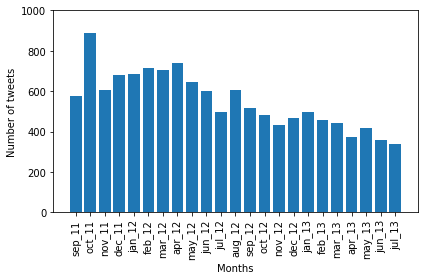

In [18]:
plt.bar(dfs_names, num_tweets_per_month)
plt.xticks(rotation=90)
plt.xlabel("Months")
plt.ylabel("Number of tweets")
plt.ylim(0, 1000)
plt.tight_layout()
plt.savefig("figures/num_tweets.png")
plt.show()

Analysis on the users

In [8]:
cwd = os.getcwd()

# Get paths of all csv files
filenames = glob.glob(cwd + '\\data\\*csv')

In [9]:
# Get all data into one dataframe 
columns = ['author id', 'author username', 'is_verified_user', 'followers_count',
       'following_count', 'tweet_count', 'listed_count', 'created_at', 'geo',
       'id', 'lang', 'like_count', 'quote_count', 'reply_count',
       'retweet_count', 'source', 'tweet']

all_data = pd.DataFrame(columns=columns)

for filename in filenames:
  temp = pd.read_csv(filename)
  temp = temp.drop((temp[temp['author username'] == 'zhanusic'].index) | (temp[temp['author username'] == 'Violahkzvo']).index).reset_index(drop=True)
  all_data = pd.concat([all_data, temp]).drop_duplicates()

all_data.shape

C:\Users\Lon\AppData\Local\Temp/ipykernel_16052/2417736778.py:11: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  temp = temp.drop((temp[temp['author username'] == 'zhanusic'].index) | (temp[temp['author username'] == 'Violahkzvo']).index).reset_index(drop=True)


(12500, 17)

In [10]:
# Reset the index for the dataset
all_data.reset_index(drop=True, inplace=True)

In [11]:
# Number of authors
author_ids = all_data['author id'].unique()
len(author_ids)

3862

In [12]:
# Help functions for follower and list plots
def in_which_follower_count_bucket(n):
  try:
    if n < 100:
      follower_count_buckets[0] += 1
    elif 100 <= n and n < 500:
      follower_count_buckets[1] += 1
    elif 500 <= n and n < 1000:
      follower_count_buckets[2] += 1
    elif 1000 <= n and n < 2000:
      follower_count_buckets[3] += 1
    elif 2000 <= n and n < 4000:
      follower_count_buckets[4] += 1
    elif 4000 <= n and n < 8000:
      follower_count_buckets[5] += 1
    elif 8000 <= n and n < 16000:
      follower_count_buckets[6] += 1
    elif n >= 16000:
      follower_count_buckets[7] += 1
  except:
    print("error with: ", n)

def in_which_listed_count_bucket(n):
  try:
    if 0 < n and n < 25:
      listed_count_buckets[0] += 1
    elif 25 <= n and n < 50:
      listed_count_buckets[1] += 1
    elif 50 <= n and n < 100:
      listed_count_buckets[2] += 1
    elif 100 <= n and n < 200:
      listed_count_buckets[3] += 1
    elif 200 <= n and n < 400:
      listed_count_buckets[4] += 1
    elif 400 <= n and n < 800:
      listed_count_buckets[5] += 1
    elif 800 <= n and n < 1600:
      listed_count_buckets[6] += 1
    elif n >= 1600:
      listed_count_buckets[7] += 1
  except:
    print("error with: ", n)

In [13]:
# Organise all author information in a dictionary where each entry is a dictionary containing the information on an author

## Count the authors by follower count
follower_range = ['n < 100','100 <= n < 500', '500 <= n < 1k', '1k <= n < 2k', '2k <= n < 4k', '4k <= n < 8k', '8k <= n < 16k', 'n >= 16k']
follower_count_buckets = [0 for _ in range(len(follower_range))]

## Count by number of listed_count
listed_range = ['0 < n < 25','25 <= n < 50', '50 <= n < 100', '100 <= n < 200', '200 <= n < 400', '400 <= n < 800', '800 <= n < 1.6k', 'n >= 1.6k']
listed_count_buckets = [0 for _ in range(len(listed_range))]

authors = {}
for id in author_ids:
  author = {}
  temp = all_data[all_data['author id'] == id].iloc[0]
  author['username'] = temp['author username']
  author['follower_count'] = temp['followers_count']
  in_which_follower_count_bucket(temp['followers_count'])
  author['tweet_count'] = temp['tweet_count']
  in_which_listed_count_bucket(temp['listed_count'])
  author['listed_count'] = temp['listed_count']
  authors[id] = author


In [14]:
# Test
authors[426722004]

{'username': 'RiskR3ward',
 'follower_count': 13624,
 'tweet_count': 25693,
 'listed_count': 307}

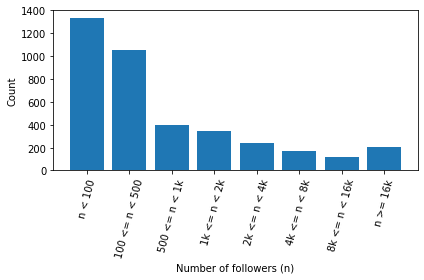

In [19]:
# Plotting the distribution of users on the number of followers they have
plt.bar(follower_range, follower_count_buckets)
plt.xticks(rotation=75)
plt.xlabel("Number of followers (n)")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("figures/followers_count.png")
plt.show()

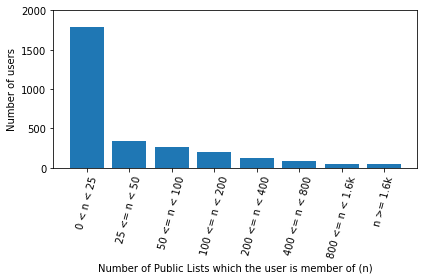

In [21]:
# Twitter has this functionality called 'List' and users can be added to Lists. 'listed_count' is the number of Public Lists which the user is member of.
plt.bar(listed_range, listed_count_buckets)
plt.xticks(rotation=75)
plt.xlabel("Number of Public Lists which the user is member of (n)")
plt.ylabel("Number of users")
plt.ylim(0, 2000)
plt.tight_layout()
plt.savefig("figures/listed_count.png")
plt.show()